# COVID-19 Analysis

Author: Nathan Nusaputra

I started this analysis with the question of what factors affect COVID-19. COVID-19 has affected the world with countries shutting down. It is an unprecedented time where social gatherings are banned and the virus can spread very quickly through droplets in the air and on surfaces. Wtih this analysis, I hope to look at the multitude of factors that can affect COVID-19 like income, density, population, poverty and see if there is any sort of relationship


## EDA

In [2]:
# import necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [3]:
# read csv data for covid and income
covid_data = pd.read_csv(r"/Users/nathannusaputra/Berkeley/COVID19_Project/Data_Raw/us-counties.csv")
income_data = pd.read_csv(r"/Users/nathannusaputra/Berkeley/COVID19_Project/Data_Raw/Kaggle_USHousehold_Income/kaggle_income.csv", encoding='latin-1')


In [4]:
# check the first couple of rows of covid data
covid_data.head() 


,date,county,state,fips,cases,deaths
0,2020-01-21,Snohomish,Washington,53061.0,1,0
1,2020-01-22,Snohomish,Washington,53061.0,1,0
2,2020-01-23,Snohomish,Washington,53061.0,1,0
3,2020-01-24,Cook,Illinois,17031.0,1,0
4,2020-01-24,Snohomish,Washington,53061.0,1,0


The covid data starts on January 21 with one case in Washington. Each day COVID progresses, the data just adds to the total for the overall state.

In [5]:
income_data.head()

,id,State_Code,State_Name,State_ab,County,City,Place,Type,Primary,Zip_Code,Area_Code,ALand,AWater,Lat,Lon,Mean,Median,Stdev,sum_w
0,1011000,1,Alabama,AL,Mobile County,Chickasaw,Chickasaw city,City,place,36611,251,10894952,909156,30.771450,-88.079697,38773,30506,33101,1638.260513
1,1011010,1,Alabama,AL,Barbour County,Louisville,Clio city,City,place,36048,334,26070325,23254,31.708516,-85.611039,37725,19528,43789,258.017685
2,1011020,1,Alabama,AL,Shelby County,Columbiana,Columbiana city,City,place,35051,205,44835274,261034,33.191452,-86.615618,54606,31930,57348,926.031000
3,1011030,1,Alabama,AL,Mobile County,Satsuma,Creola city,City,place,36572,251,36878729,2374530,30.874343,-88.009442,63919,52814,47707,378.114619
4,1011040,1,Alabama,AL,Mobile County,Dauphin Island,Dauphin Island,Town,place,36528,251,16204185,413605152,30.250913,-88.171268,77948,67225,54270,282.320328


In [6]:
covid_data.describe()

,fips,cases,deaths
count,61164.000000,61971.000000,61971.000000
mean,29601.488980,121.685353,4.025415
std,15528.488936,1520.051958,82.937968
min,1001.000000,0.000000,0.000000
25%,17179.000000,2.000000,0.000000
50%,28143.000000,6.000000,0.000000
75%,42131.000000,25.000000,1.000000
max,56043.000000,118302.000000,8215.000000


In [7]:
income_data.describe()

,id,State_Code,Zip_Code,ALand,AWater,Lat,Lon,Mean,Median,Stdev,sum_w
count,3.252600e+04,32526.000000,32526.000000,3.252600e+04,3.252600e+04,32526.000000,32526.000000,32526.000000,32526.000000,32526.000000,32526.000000
mean,6.203707e+07,28.624885,50182.648404,1.165893e+08,6.952054e+06,37.731983,-91.303844,66703.986042,85452.938818,47273.695321,576.910273
std,1.115546e+08,16.297205,29410.122808,1.280894e+09,2.092093e+08,5.579450,16.227588,30451.194599,87810.895132,16555.486882,3911.006939
min,1.026000e+03,1.000000,601.000000,0.000000e+00,0.000000e+00,17.929085,-175.860041,0.000000,0.000000,0.000000,0.000000
25%,8.021282e+06,13.000000,26362.000000,1.906991e+06,0.000000e+00,34.013469,-97.664034,46015.500000,36046.250000,36075.000000,201.436458
50%,2.901168e+07,29.000000,48163.000000,5.022976e+06,2.703350e+04,38.925588,-87.139280,60738.000000,51874.500000,46179.000000,329.482618
75%,4.802899e+07,42.000000,76712.000000,3.090984e+07,5.082078e+05,41.495793,-79.852969,82223.500000,80915.000000,58078.000000,590.227670
max,4.802211e+08,72.000000,99950.000000,9.163267e+10,2.453228e+10,71.253500,-65.500823,242857.000000,300000.000000,113936.000000,612241.922964


In [36]:
income_data = income_data[income_data['Mean']>0]

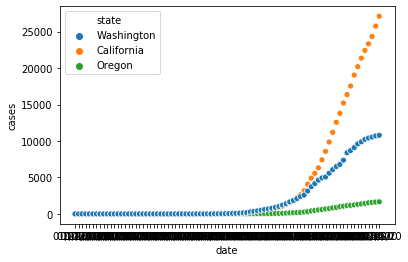

In [37]:
# clean data
covid_data["date"] = pd.to_datetime(covid_data["date"])
covid_data["date"] = covid_data["date"].dt.strftime('%m/%d/%y')


# group by state
states_data = covid_data.groupby(['date','state'], as_index=False).agg('sum').drop(columns=['fips'])
west_coast = states_data[states_data.state.isin(["Washington","Oregon","California"])]

ax = sns.scatterplot(x="date", y="cases",hue="state", data=west_coast)

In [38]:
# average income data
income_data[income_data.City=='Snohomish']

income_county_df = income_data.groupby(['State_Name', 'State_ab', 'County'], as_index=False).agg('mean').drop(columns=['ALand', 'Zip_Code', 'AWater', 'Lat', 'Lon', 'Median', 'Stdev', 'sum_w'])

income_city_df = income_data.groupby(['State_Name', 'State_ab', 'City'], as_index=False).agg('mean').drop(columns=['ALand', 'Zip_Code', 'AWater', 'Lat', 'Lon', 'Median', 'Stdev', 'sum_w'])

# add "County" to end of county name in covid dataframe
covid_data['County_upd'] = covid_data.county+" County"

# join based on new County column
final_df = covid_data.merge(income_county_df, how='left', left_on=['County_upd','state'], right_on=['County', 'State_Name'])
final_df = final_df.drop(columns=[ 'County','id', 'State_Code', 'fips'])

# join based on city and county as I have noticed that SF is not a county
final_df2 = final_df.merge(income_city_df, how='left', left_on=['county','state'], right_on=['City', 'State_Name'])

# if mean is null fill it with the other mean and same with state abbreviations
final_df2['Mean_x'] = final_df2.apply(lambda row: row['Mean_y'] if np.isnan(row['Mean_x']) else row['Mean_x'], axis=1)
final_df2['State_ab_x'] = final_df2.apply(lambda row: row['State_ab_y'] if pd.isnull(row['State_ab_x']) else row['State_ab_x'], axis=1)

# drop unnecessary columns
final_df2 = final_df2.drop(columns = ['State_ab_y', 'Mean_y', 'State_Name_x', 'City', 'id', 'State_Code', 'State_Name_y'])

final_df2.head()

# change name of column
final_df2.rename(columns={'Mean_x' :'mean_income'}, inplace=True)

# final_df[final_df.date=='04/01/20']

In [39]:
# find list of counties and state that are not included to show where bias of data starts
missing_data_df = final_df2[final_df2['State_ab_x'].isnull()]
len(missing_data_df)

22517

In [40]:
# create final dataframe for unique counties and states that are missing to show where data may be skewed
missing_data_df = missing_data_df.groupby(['state'], as_index=False).agg('sum')
missing_data_df.head()

,state,cases,deaths,mean_income
0,Alabama,7599,131,0.0
1,Alaska,2184,23,0.0
2,Arizona,83,51,0.0
3,Arkansas,6543,93,0.0
4,California,2928,122,0.0


In [41]:
# drop all the nulls
final_df3 = final_df2.dropna()
len(final_df3)

39454

In [42]:
final_df3.head()

final_df3.date.max()

# filter just for the latest date
max_date = final_df3[final_df3.date=='04/15/20']

## Analysis

Text(0.5, 1.0, 'Cases vs Deaths on 4/15/2020')

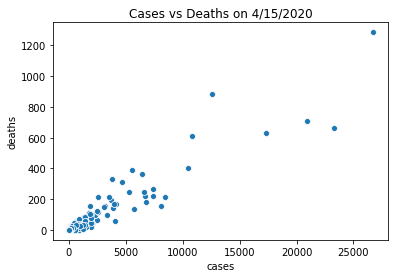

In [43]:
ax = sns.scatterplot(x='cases', y='deaths', data=max_date)
plt.title('Cases vs Deaths on 4/15/2020')

There seems to be a positive relationship between cases and deaths.

Text(0.5, 1.0, 'Mean Income vs Cases on April 15, 2020')

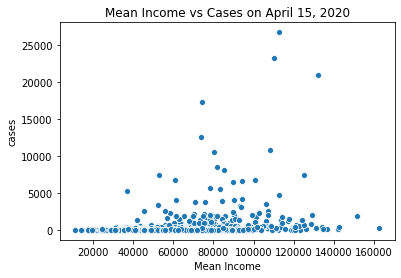

In [44]:
# Mean income by cases graph
ax = sns.scatterplot(x='mean_income', y='cases', data=max_date)
plt.xlabel('Mean Income')
plt.title('Mean Income vs Cases on April 15, 2020')

There seems to be a bell shaped curve for this where middle class income 

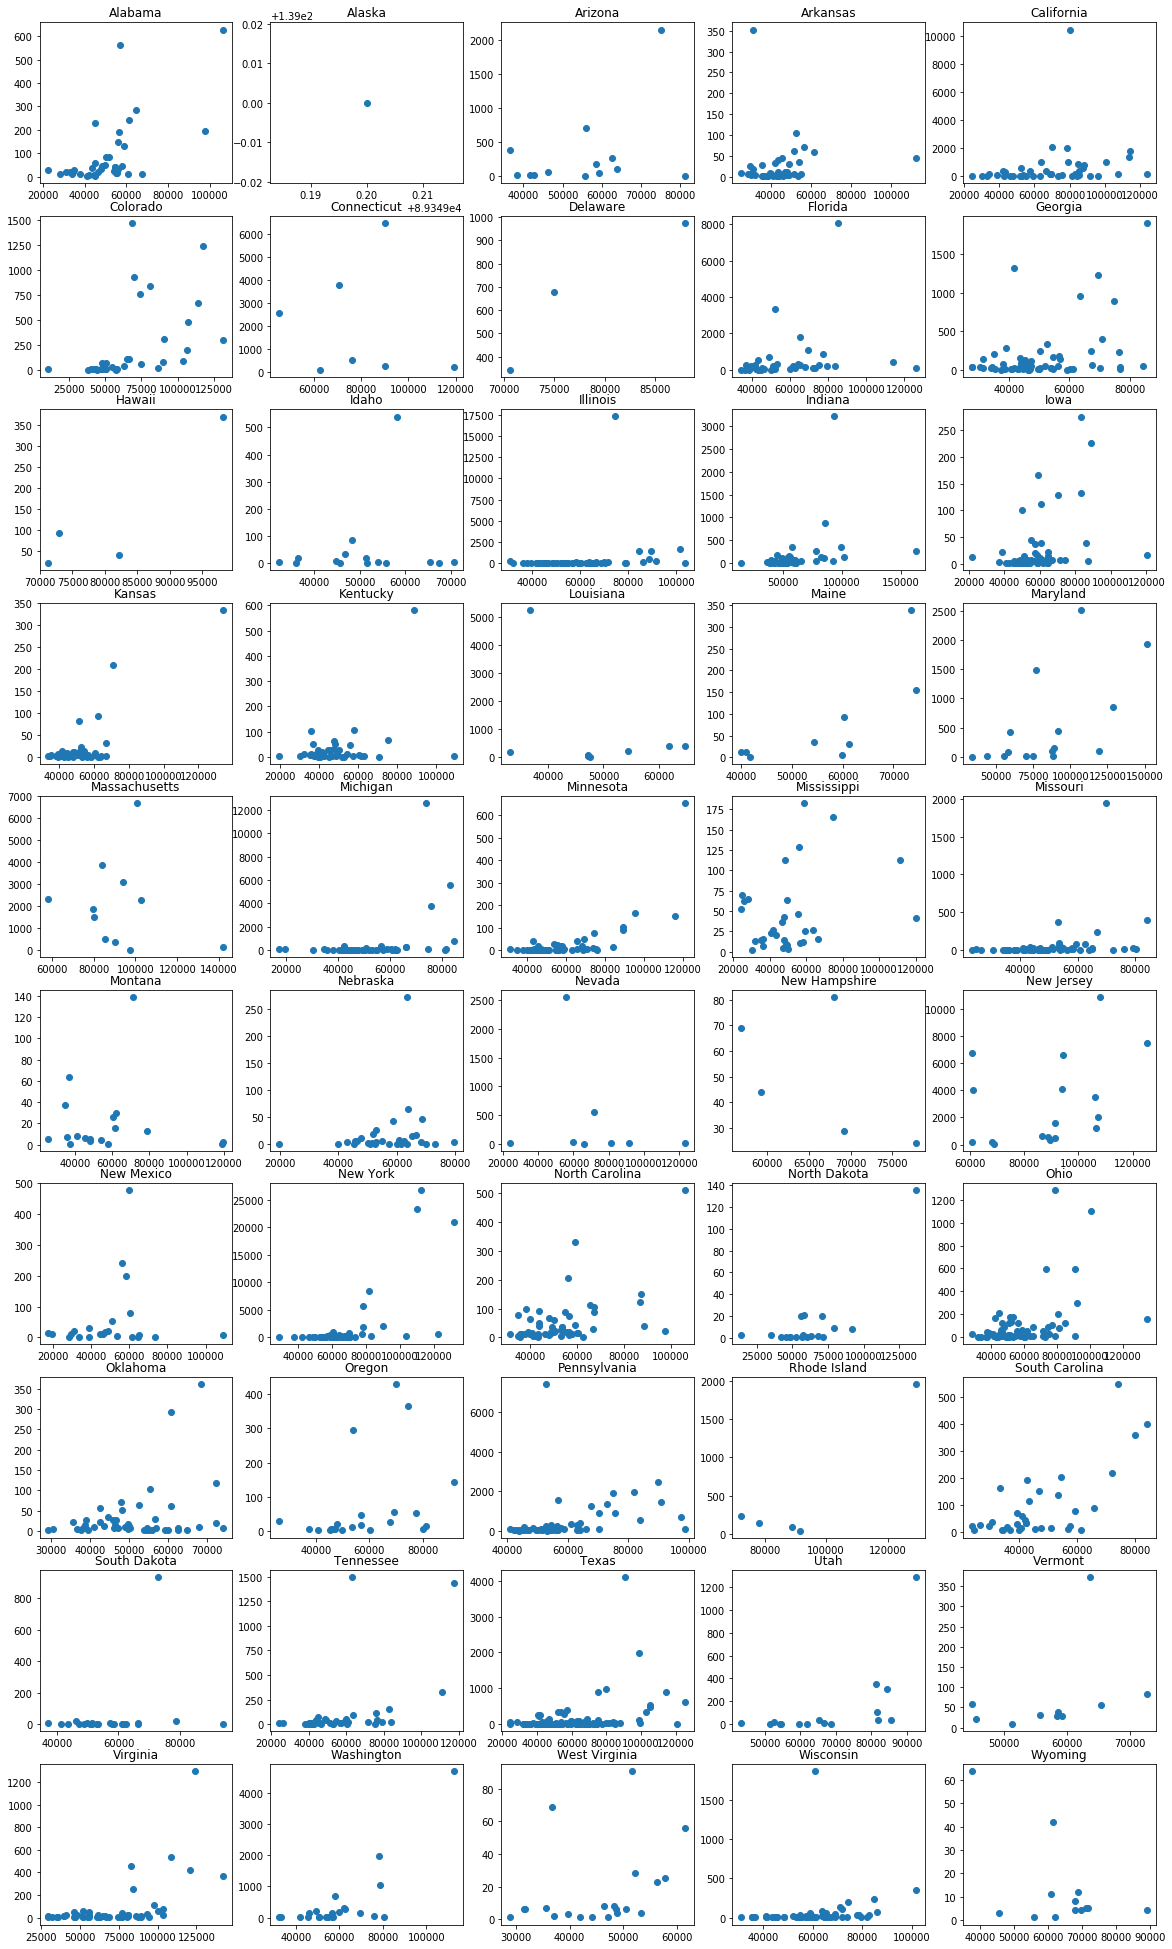

In [45]:
# graph of cases and mean income

fig, axs = plt.subplots(10,5, figsize=(20,35))

count=0

for i in range(0,10):
    for j in range(0,5):
        data = max_date[max_date.state == list(max_date['state'].unique())[count]]
        axs[i,j].scatter(x='mean_income', y='cases', data=data)
        axs[i,j].set_title(list(max_date['state'].unique())[count])
        count+=1

        
# list(max_date['state'].unique())

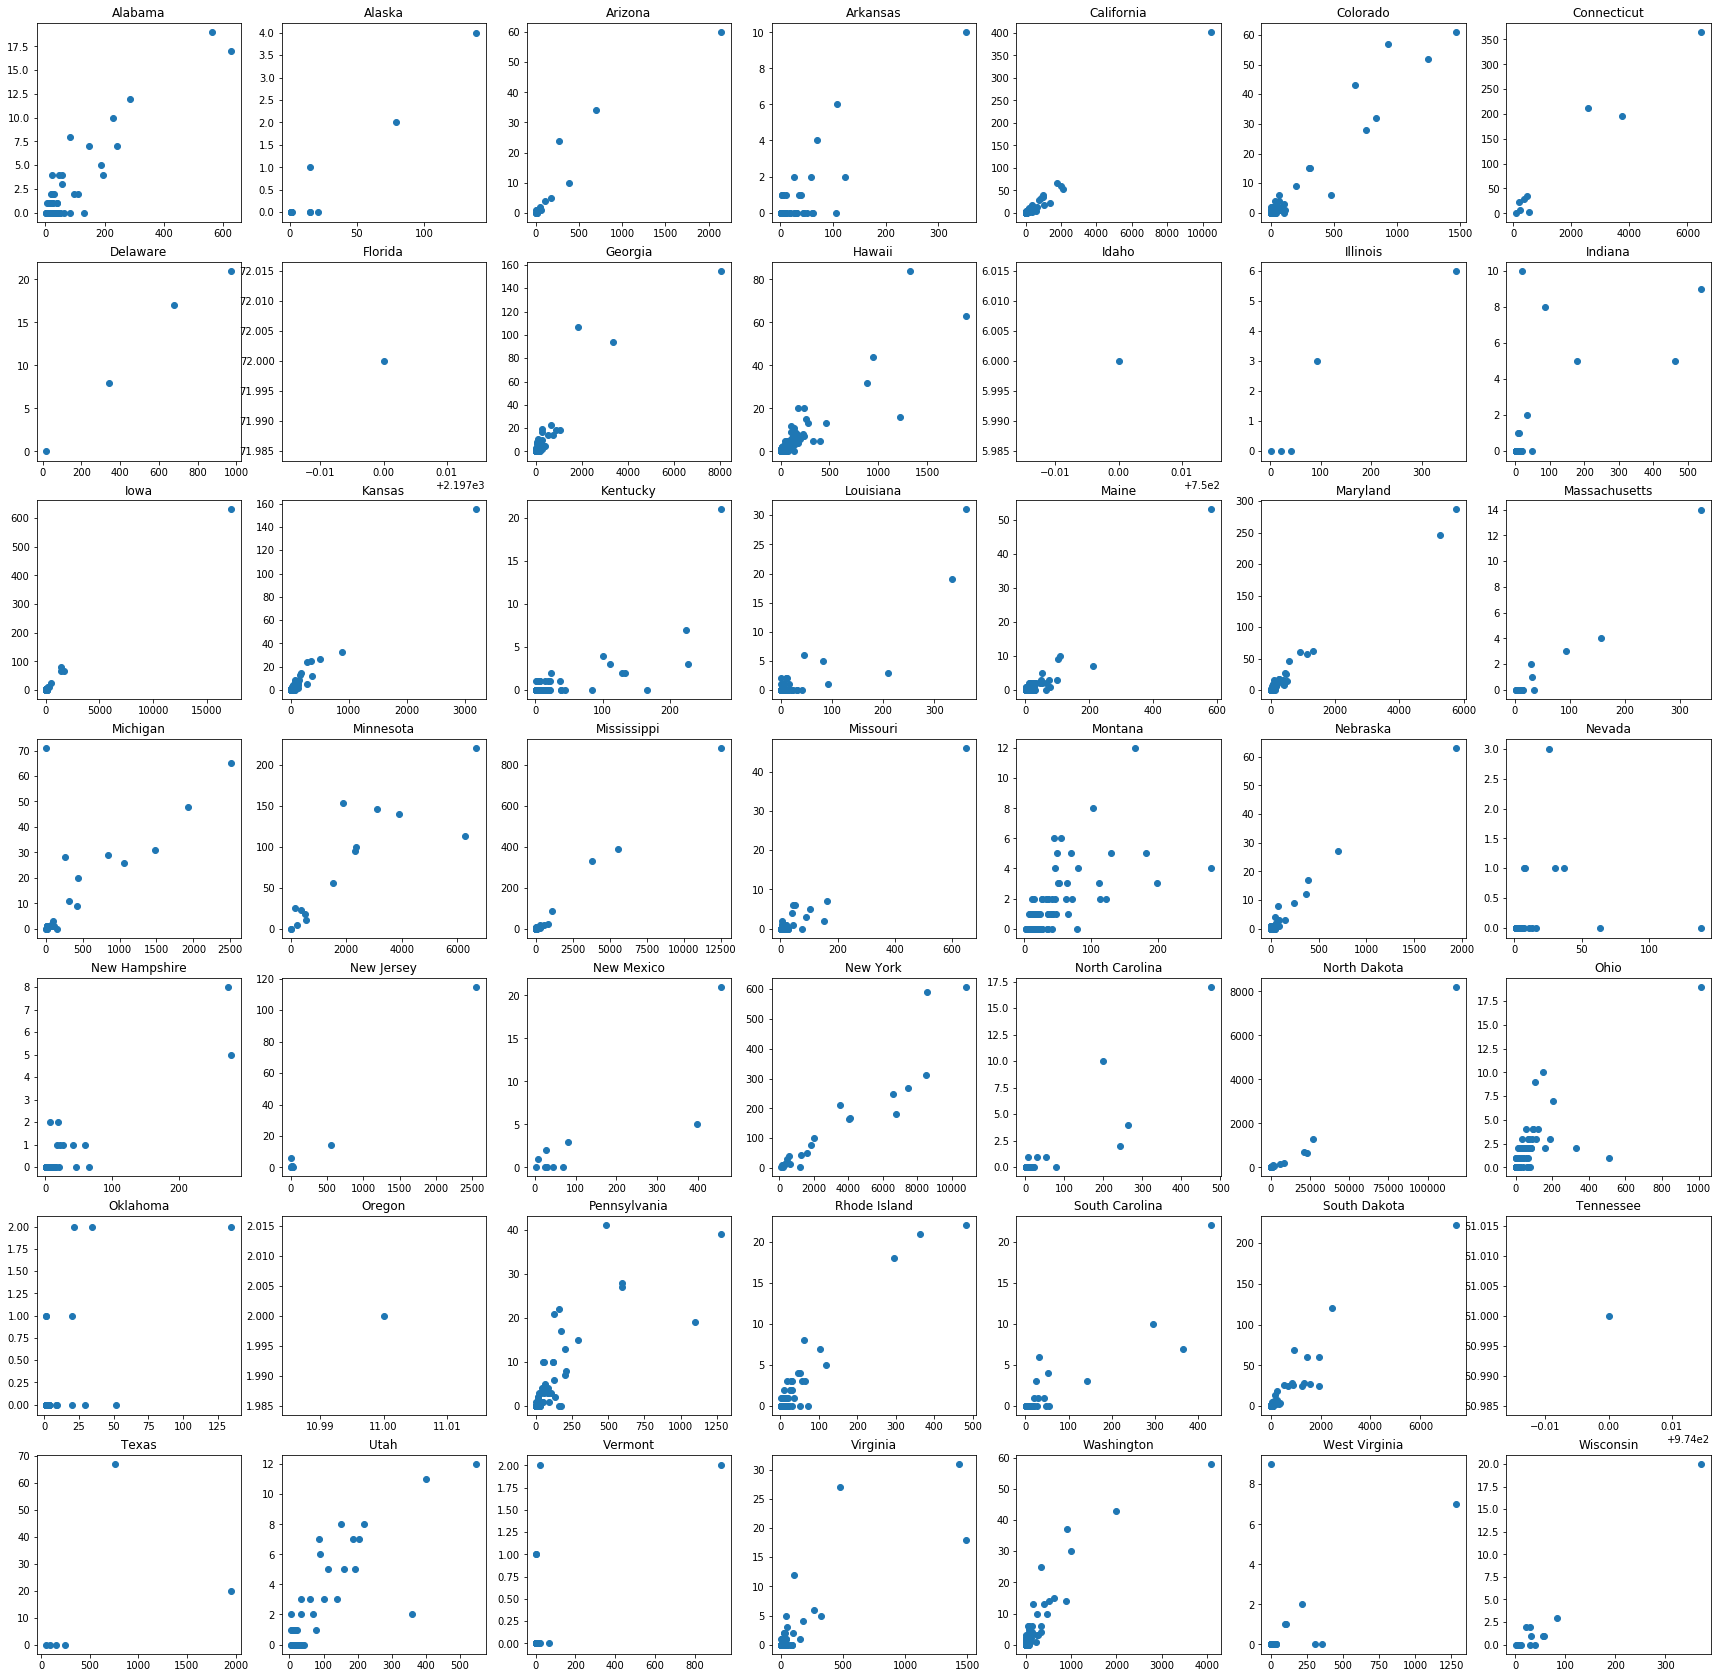

In [89]:
# graph of cases and deaths

fig, axs = plt.subplots(7,7, figsize=(30,30))
covid_data_max = covid_data[covid_data.date=='04/15/20']
count=0
plt.title('Cases vs. Deaths')
for i in range(0,7):
    for j in range(0,7):
        data = covid_data_max[covid_data_max.state == list(covid_data_max['state'].unique())[count]]
        axs[i,j].scatter(x='cases', y='deaths', data=data)
        axs[i,j].set_title(list(max_date['state'].unique())[count])
#         axs[i,j].set_xlabel('Cases')
#         axs[i,j].set_ylabel('Deaths')
        count+=1


In [88]:
covid_data_max

,date,county,state,fips,cases,deaths,County_upd
59249,04/15/20,Autauga,Alabama,1001.0,25,1,Autauga County
59250,04/15/20,Baldwin,Alabama,1003.0,98,2,Baldwin County
59251,04/15/20,Barbour,Alabama,1005.0,13,0,Barbour County
59252,04/15/20,Bibb,Alabama,1007.0,19,0,Bibb County
59253,04/15/20,Blount,Alabama,1009.0,17,0,Blount County
...,...,...,...,...,...,...,...
61966,04/15/20,Sublette,Wyoming,56035.0,1,0,Sublette County
61967,04/15/20,Sweetwater,Wyoming,56037.0,10,0,Sweetwater County
61968,04/15/20,Teton,Wyoming,56039.0,59,0,Teton County
61969,04/15/20,Uinta,Wyoming,56041.0,4,0,Uinta County


### Compare three popular states among the group

In [66]:
state_data = max_date[(max_date.state == 'California') | (max_date.state == 'New York')|(max_date.state == 'Washington')]


state_data = state_data.rename(columns={'state':'State'})

state_data


,date,county,State,cases,deaths,County_upd,State_ab_x,mean_income
59415,04/15/20,Alameda,California,983,36,Alameda County,CA,79152.832904
59416,04/15/20,Alpine,California,2,0,Alpine County,CA,91662.000000
59417,04/15/20,Amador,California,6,0,Amador County,CA,52845.666667
59418,04/15/20,Butte,California,16,0,Butte County,CA,63420.666667
59419,04/15/20,Calaveras,California,9,0,Calaveras County,CA,81593.000000
...,...,...,...,...,...,...,...,...
61827,04/15/20,Snohomish,Washington,1987,80,Snohomish County,WA,78124.000000
61828,04/15/20,Spokane,Washington,290,17,Spokane County,WA,62310.333333
61833,04/15/20,Walla Walla,Washington,26,0,Walla Walla County,WA,57262.000000
61834,04/15/20,Whatcom,Washington,269,25,Whatcom County,WA,62703.000000


Text(0, 0.5, 'Cases')

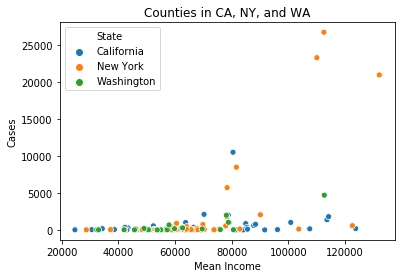

In [68]:
sns.scatterplot(x='mean_income', y='cases', data=state_data, hue="State")
plt.title('Counties in CA, NY, and WA')
plt.xlabel('Mean Income')
plt.ylabel('Cases')